<a href="https://colab.research.google.com/github/handikamsf/classification/blob/main/hr-analytics-job-change-of-data-scientists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Wrangling A**

**Kelompok:** 7

---

**Nama (NPM):**

Saif Ali Zaky A. (24083010004)

M. Handika M. S. (24083010036)

Rizky Faza H. N. (24083010099)

Indra Maulana R. F. Y. (24083010105)

Yafi Rafsanjani H. (24083010122)


---


**Dosen Pengampu:**

Andri Fauzan Adziima, M.Si.

Kartika Maulida Hindrayani, S.Kom., M.Kom

# **Dataset**

In [ ]:
!pip install category_encoders
!pip install imblearn
!pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,roc_auc_score, confusion_matrix, classification_report,precision_score,recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from google.colab import files
uploaded = files.upload()

import os
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d arashnic/hr-analytics-job-change-of-data-scientists

Dataset URL: https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists
License(s): CC0-1.0
hr-analytics-job-change-of-data-scientists.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip hr-analytics-job-change-of-data-scientists.zip

Archive:  hr-analytics-job-change-of-data-scientists.zip
replace aug_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace aug_train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# **Eksplorasi Data**

In [ ]:
df = pd.read_csv("aug_train.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
df_test = pd.read_csv("aug_test.csv")
df_test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [ ]:
submission = pd.read_csv("sample_submission.csv")
submission

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5
...,...,...
2124,1289,0.5
2125,195,0.5
2126,31762,0.5
2127,7873,0.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
print(df.isnull().sum())

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


In [ ]:
df_categorical = df.select_dtypes(include='object')
df_numerical = df.select_dtypes(exclude='object')

In [ ]:
df_categorical.describe()

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [ ]:
df_numerical.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


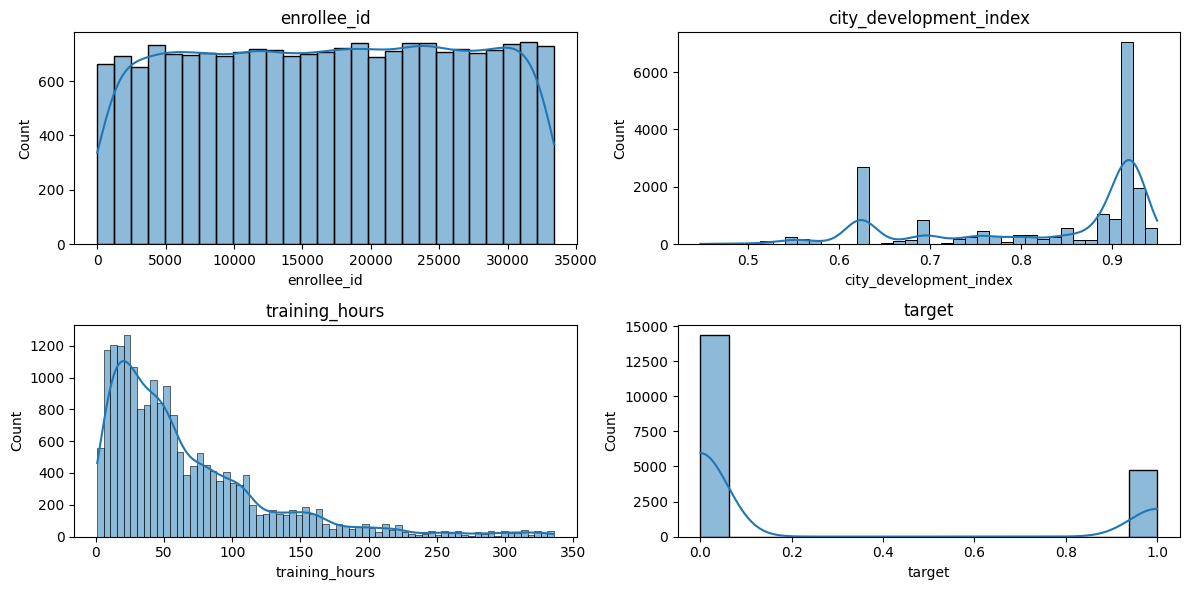

In [ ]:
# Visualisasi distribusi fitur numerik
plt.figure(figsize=(12, 6))
for i, col in enumerate(df_numerical.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_numerical[col], kde=True)
    plt.title(col)
plt.tight_layout()

<ipython-input-214-bf3d842c1df0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col].fillna("Unknown"), data=df, ax=axes[row, col_idx], palette="pastel")
<ipython-input-214-bf3d842c1df0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col].fillna("Unknown"), data=df, ax=axes[row, col_idx], palette="pastel")
<ipython-input-214-bf3d842c1df0>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col].fillna("Unknown"), data=df, ax=axes[row, col_idx], palette="pastel")
<ipython-input-214-bf3d842c1df0>:15: FutureWarning: 

P

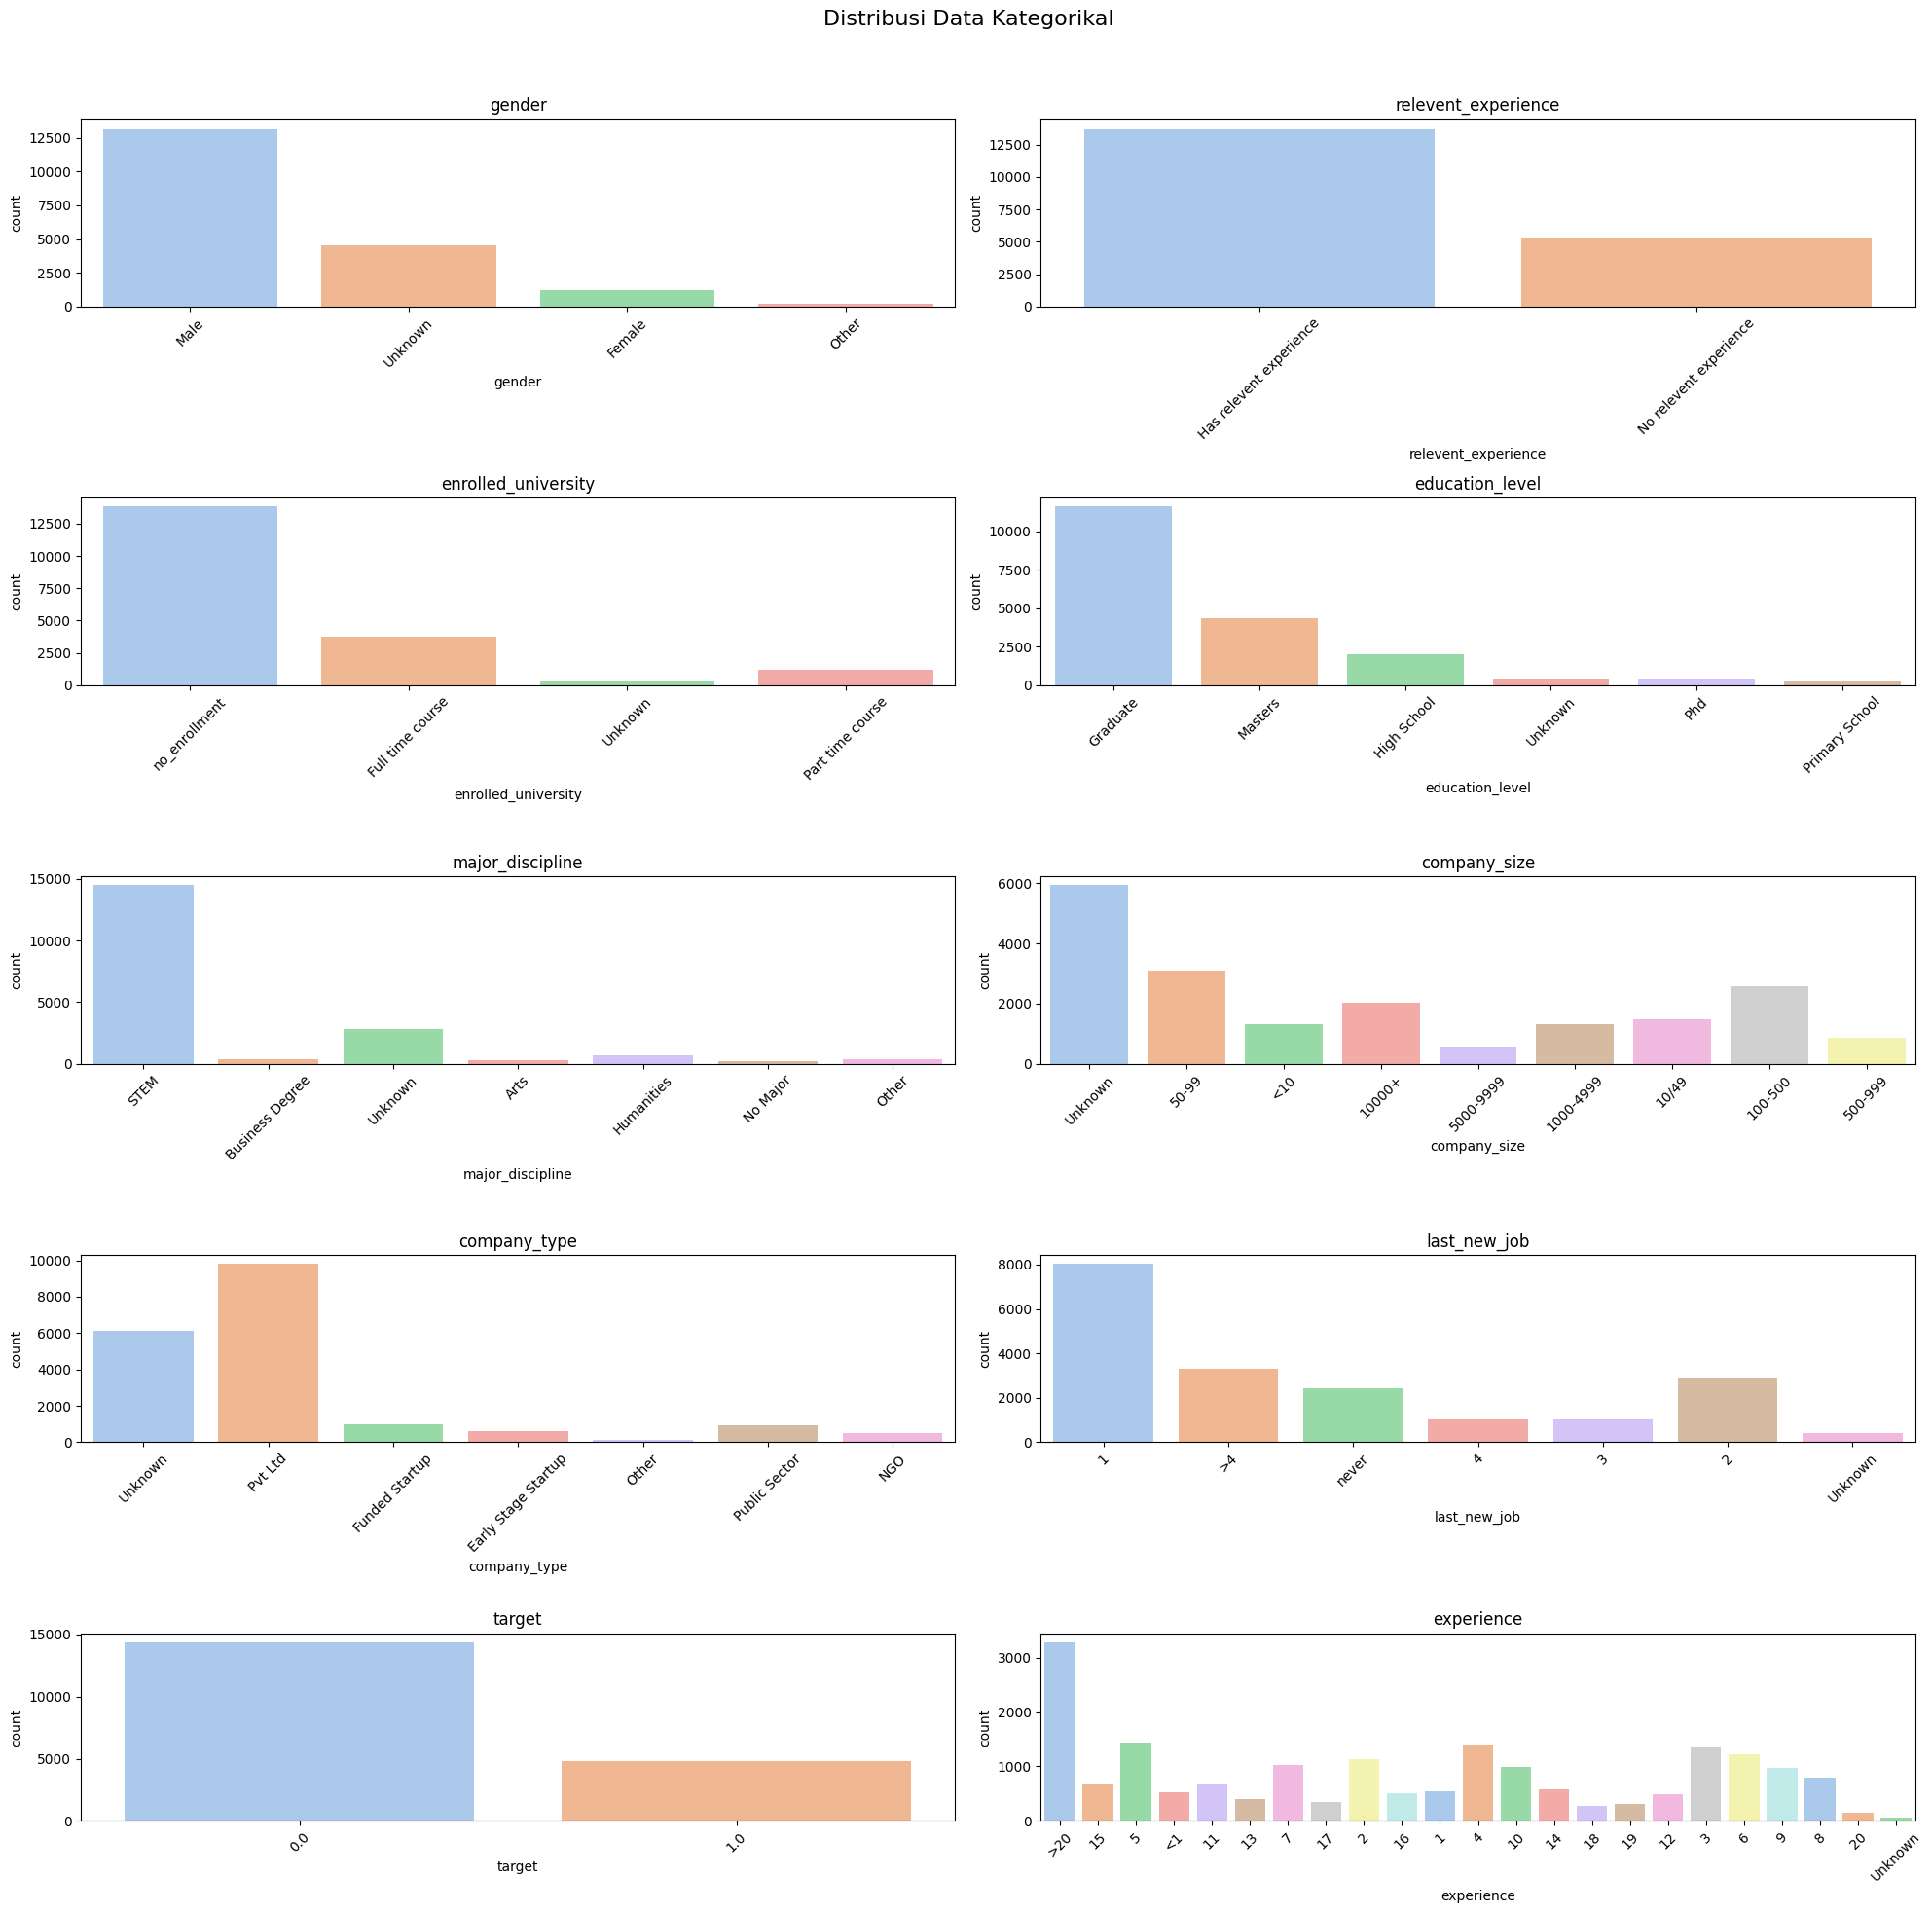

In [ ]:
# Daftar kolom kategorikal
categorical_columns = [
    "gender", "relevent_experience", "enrolled_university",
    "education_level", "major_discipline", "company_size",
    "company_type", "last_new_job", "target", "experience"
]

# Menentukan ukuran figure
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
fig.suptitle("Distribusi Data Kategorikal", fontsize=16)

# Looping setiap kolom kategorikal dan plot countplot
for i, col in enumerate(categorical_columns):
    row, col_idx = divmod(i, 2)  # Menentukan posisi subplot
    sns.countplot(x=df[col].fillna("Unknown"), data=df, ax=axes[row, col_idx], palette="pastel")
    axes[row, col_idx].set_title(col)
    axes[row, col_idx].tick_params(axis="x", rotation=45)

# Menyesuaikan layout agar tidak saling tumpang tindih
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# **Data Preprocessing**

### **Mendeteksi Missing Value**

In [ ]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent.round(2),
    'Data Type': df.dtypes
})

print(missing_data.sort_values(by='Percentage (%)', ascending=False))

                        Missing Values  Percentage (%) Data Type
company_type                      6140           32.05    object
company_size                      5938           30.99    object
gender                            4508           23.53    object
major_discipline                  2813           14.68    object
education_level                    460            2.40    object
last_new_job                       423            2.21    object
enrolled_university                386            2.01    object
experience                          65            0.34    object
enrollee_id                          0            0.00     int64
city                                 0            0.00    object
relevent_experience                  0            0.00    object
city_development_index               0            0.00   float64
training_hours                       0            0.00     int64
target                               0            0.00   float64


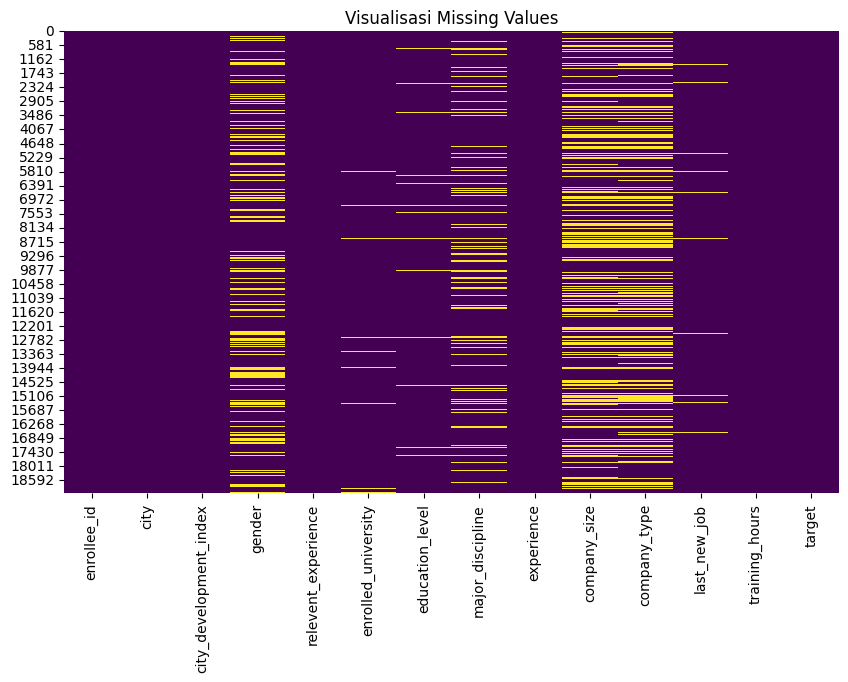

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

## **Fitur Numerik**

In [ ]:
df = pd.read_csv("aug_train.csv")
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
df_try = df.copy()

### **Mendeteksi dan Menangani Outliers**

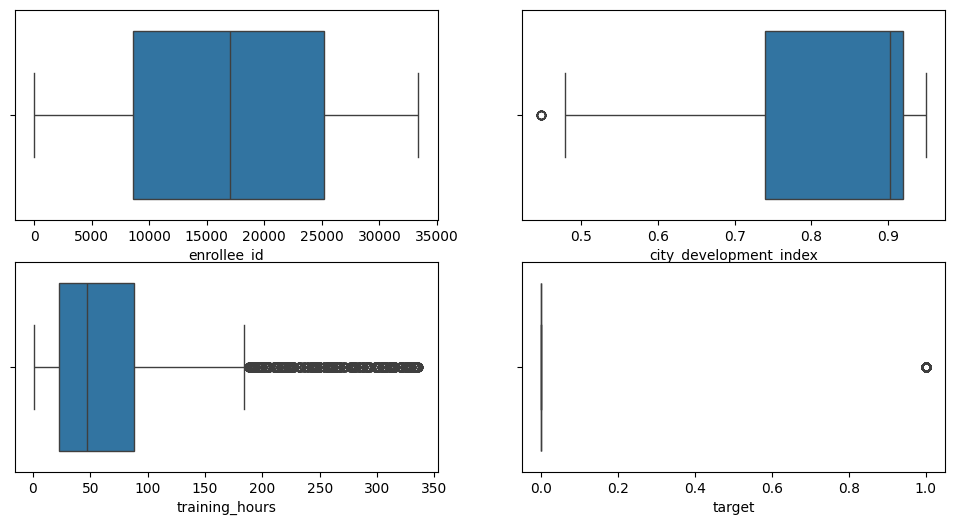

In [ ]:
# Boxplot kolom numerik
plt.figure(figsize=(12, 6))
for i, col in enumerate(df_numerical.columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df[col])

In [ ]:
# Winsorizing outlier training_hours dan city_development_index
from scipy.stats.mstats import winsorize
def cap_outliers(df):
    df['training_hours'] = winsorize(df['training_hours'], (0, 0.05))
    df['city_development_index'] = winsorize(df['city_development_index'], (0, 0.05))

cap_outliers(df_try)

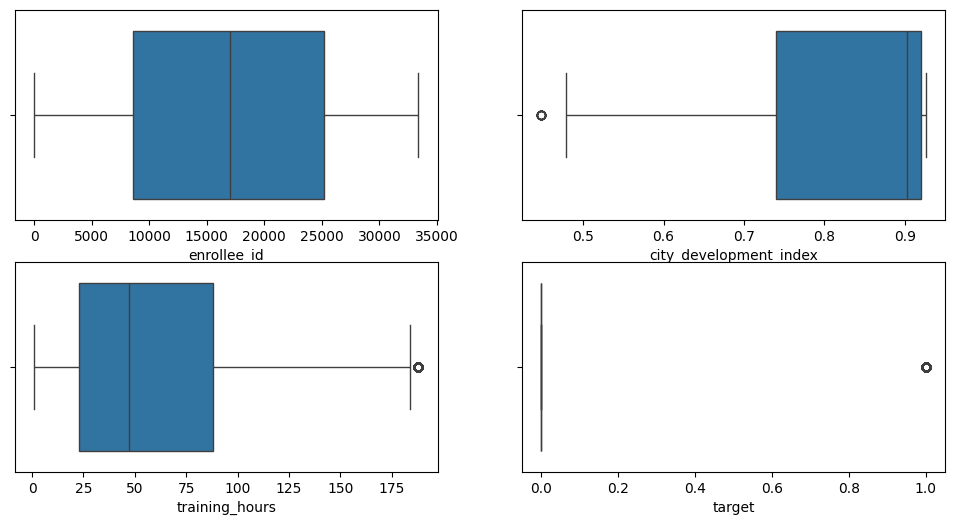

In [ ]:
# Boxplot kolom numerik
plt.figure(figsize=(12, 6))
for i, col in enumerate(df_try.select_dtypes(include=np.number).columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df_try[col])

### **Melakukan Transformasi**

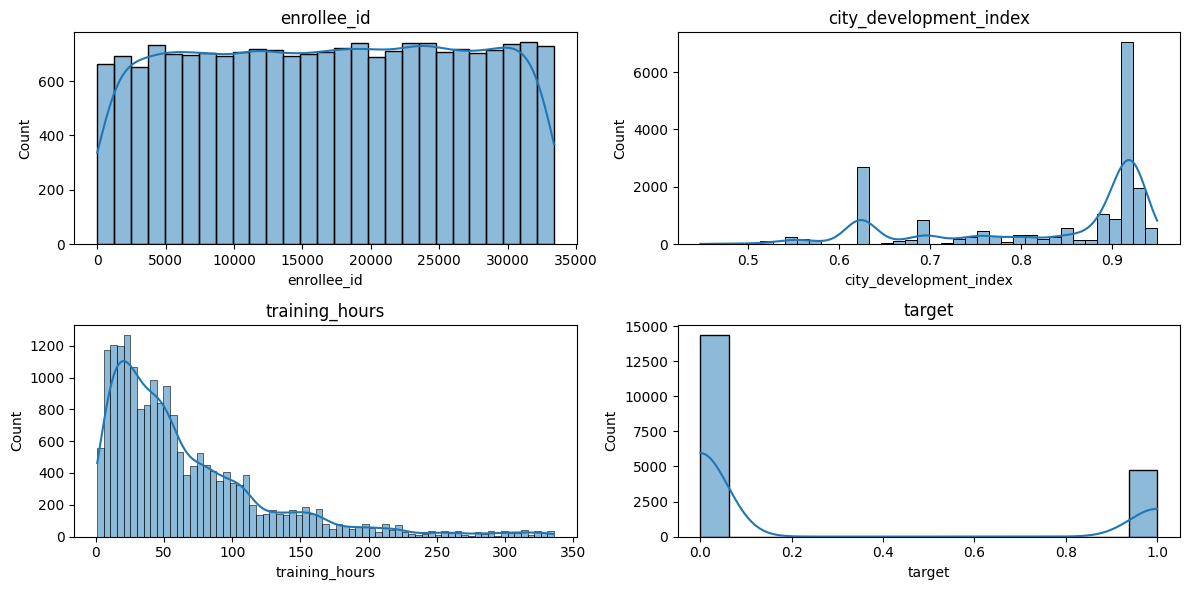

In [ ]:
# Visualisasi distribusi fitur numerik
plt.figure(figsize=(12, 6))
# Get numerical columns using select_dtypes
for i, col in enumerate(df.select_dtypes(include=np.number).columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()

In [ ]:
from sklearn.preprocessing import PowerTransformer
def transform (df):
  # Yeo-Johnson transform city_development_index dan training_hours
  pt = PowerTransformer(method='yeo-johnson')
  df['city_development_index'] = pt.fit_transform(df[['city_development_index']])
  df['training_hours'] = pt.fit_transform(df[['training_hours']])

transform(df_try)

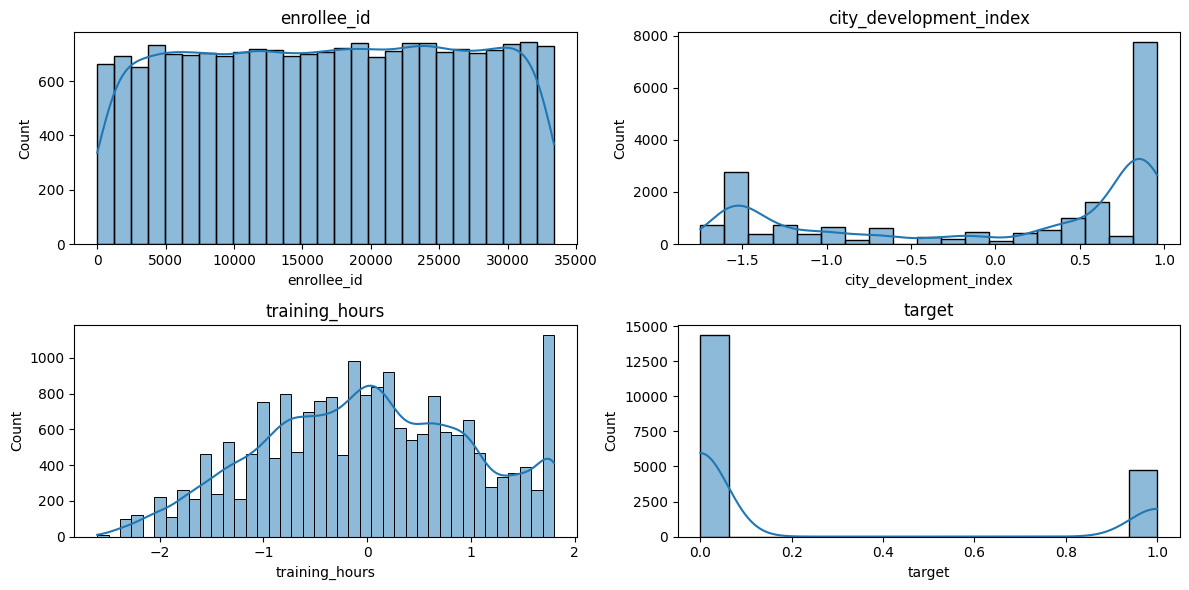

In [ ]:
# Visualisasi distribusi fitur numerik
plt.figure(figsize=(12, 6))
# Get numerical columns using select_dtypes
for i, col in enumerate(df_try.select_dtypes(include=np.number).columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_try[col], kde=True)
    plt.title(col)
plt.tight_layout()

## **Fitur Kategorikal**

### **Data Cleaning**

In [ ]:
# Replacing "city_" in all records of city feature to get only the city name
def clean_city(df):
    converted_list_1 = []
    for i in range(len(df["city"])):
        j = df["city"][i].replace("city_","")
        converted_list_1.append(j)
    df["city"]=pd.Series(converted_list_1)
    df["city"] = df["city"].astype('int')

In [ ]:
# Clean in expereience feature
def clean_experience(df):
    for i in df["experience"]:
        if(i==">20"):
            df["experience"][df["experience"]==i]=21
        if(i == "<1"):
            df["experience"][df["experience"]==i]=0

    df["experience"] = df['experience'].astype('float')

clean_experience(df_try)

<ipython-input-226-4f9a41d967ee>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["experience"][df["experience"]==i]=21
<ipython-input-226-4f9a41d967ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [ ]:
# Changing some classes with string values to integers
def clean_last_new_job(df):
    converted_list_1 = []
    converted_list_2 = []
    for i in df["last_new_job"]:
        if i == "never" or i == np.nan:
            i = 0
            converted_list_1.append(i)
        converted_list_1.append(i)
        if i == ">4":
            i = 5
            converted_list_2.append(i)
        converted_list_2.append(i)
    df["last_new_job"]=pd.Series(converted_list_1)
    df["last_new_job"]=pd.Series(converted_list_2)
    df["last_new_job"] = df["last_new_job"].astype('float')

clean_last_new_job(df_try)

In [ ]:
# Changing range value to fixed integers in company_size feature
def clean_company_size_1(df):
    converted_list_1 = []
    converted_list_2 = []
    converted_list_3 = []
    for i in df["company_size"]:
        if i == "10/49":
            i = "10-49"
            converted_list_1.append(i)
        converted_list_1.append(i)
        if i == "<10":
            i = '1-9'
            converted_list_2.append(i)
        converted_list_2.append(i)
        if i == "10000+":
            i = '10000-20000'
            converted_list_3.append(i)
        converted_list_3.append(i)
    df["company_size"]=pd.Series(converted_list_1)
    df["company_size"]=pd.Series(converted_list_2)
    df["company_size"]=pd.Series(converted_list_3)
    new = df['company_size'].str.split("-", n = 1, expand = True)
    df["company_size_avg"] = (pd.to_numeric(new[0]) + pd.to_numeric(new[1]))/2

clean_company_size_1(df_try)

In [ ]:
# Nominal Encoding on relevent_experience feature
def clean_relevent_experience(df):
    converted_list_1 = []
    converted_list_2 = []
    for i in df["relevent_experience"]:
        if i == "Has relevent experience":
            i = 1
            converted_list_1.append(i)
        converted_list_1.append(i)
        if i == "No relevent experience":
            i = 0
            converted_list_2.append(i)
        converted_list_2.append(i)
    df["relevent_experience"]=pd.Series(converted_list_1)
    df["relevent_experience"]=pd.Series(converted_list_2)

clean_relevent_experience(df_try)

### **Mengisi Nilai NaN**

In [ ]:
missing_values = df_try.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent.round(2),
    'Data Type': df_try.dtypes
})

print(missing_data.sort_values(by='Percentage (%)', ascending=False))

                        Missing Values  Percentage (%) Data Type
company_type                      6140           32.05    object
company_size                      5383           28.10    object
company_size_avg                  5383           28.10   float64
gender                            4508           23.53    object
major_discipline                  2813           14.68    object
education_level                    460            2.40    object
enrolled_university                386            2.01    object
last_new_job                       362            1.89   float64
experience                          65            0.34   float64
city                                 0            0.00    object
city_development_index               0            0.00   float64
relevent_experience                  0            0.00     int64
enrollee_id                          0            0.00     int64
training_hours                       0            0.00   float64
target                   

In [ ]:
def clean_NAN(df):
# Filling NA with new class ("unknown")
    df["gender"].fillna(value="Unknown", inplace=True)
    df["major_discipline"].fillna(value="Unknown", inplace=True)
    df["company_size"].fillna(value="Unknown", inplace=True)
    df["company_type"].fillna(value="Unknown", inplace=True)
    df["company_size_avg"].fillna(value="Unknown", inplace=True)

# Filling NA <5% with modus
    df['education_level'] = df['education_level'].fillna(df['education_level'].mode()[0])
    df['enrolled_university'] = df['enrolled_university'].fillna(df['enrolled_university'].mode()[0])
    df['last_new_job'] = df['last_new_job'].fillna(df['last_new_job'].mode()[0])
    df['experience'] = df['experience'].fillna(df['experience'].mode()[0])

clean_NAN(df_try)

<ipython-input-231-799c736fa199>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["gender"].fillna(value="Unknown", inplace=True)
<ipython-input-231-799c736fa199>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
missing_values = df_try.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent.round(2),
    'Data Type': df_try.dtypes
})

print(missing_data.sort_values(by='Percentage (%)', ascending=False))

                        Missing Values  Percentage (%) Data Type
enrollee_id                          0             0.0     int64
city                                 0             0.0    object
city_development_index               0             0.0   float64
gender                               0             0.0    object
relevent_experience                  0             0.0     int64
enrolled_university                  0             0.0    object
education_level                      0             0.0    object
major_discipline                     0             0.0    object
experience                           0             0.0   float64
company_size                         0             0.0    object
company_type                         0             0.0    object
last_new_job                         0             0.0   float64
training_hours                       0             0.0   float64
target                               0             0.0   float64
company_size_avg         

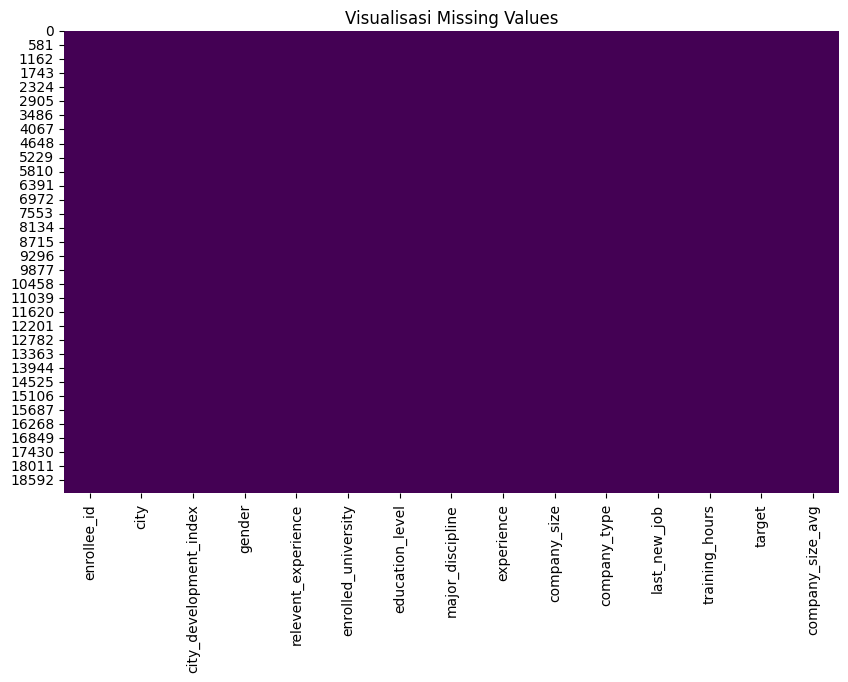

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_try.isnull(), cbar=False, cmap="viridis")
plt.title("Visualisasi Missing Values")
plt.show()

In [ ]:
# One Hot encoding base function
def one_hot_encoding(df,col):
    one_hot_encoder= ce.OneHotEncoder(cols=col,return_df=True,use_cat_names=True,handle_unknown='ignore')
    df_final = one_hot_encoder.fit_transform(df)
    return df_final

# Applying one hot encoding on all required columns
def apply_one_hot_encoding(df):
    df_final = one_hot_encoding(df,"enrolled_university")
    df_final = one_hot_encoding(df_final,"gender")
    df_final = one_hot_encoding(df_final,"company_type")
    df_final = one_hot_encoding(df_final,"major_discipline")
    return df_final

apply_one_hot_encoding(df_try)

,enrollee_id,city,city_development_index,gender_Male,gender_Unknown,gender_Female,gender_Other,relevent_experience,enrolled_university_no_enrollment,enrolled_university_Full time course,...,company_type_Pvt Ltd,company_type_Funded Startup,company_type_Early Stage Startup,company_type_Other,company_type_Public Sector,company_type_NGO,last_new_job,training_hours,target,company_size_avg
0,8949,city_103,0.845081,1,0,0,0,1,1,0,...,0,0,0,0,0,0,1.0,-0.291852,1.0,Unknown
1,29725,city_40,-0.881099,1,0,0,0,0,1,0,...,1,0,0,0,0,0,5.0,-0.005735,0.0,74.5
2,11561,city_21,-1.529706,0,1,0,0,0,0,1,...,0,0,0,0,0,0,5.0,0.667014,0.0,Unknown
3,33241,city_115,-0.785354,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0.0,0.107512,1.0,Unknown
4,666,city_162,-0.942434,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0.0,-1.592545,0.0,74.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.160408,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1.0,-0.128629,1.0,74.5
19154,31398,city_103,0.845081,1,0,0,0,0,1,0,...,0,0,0,0,0,0,4.0,0.107512,1.0,Unknown
19155,24576,city_103,0.845081,1,0,0,0,1,1,0,...,1,0,0,0,0,0,5.0,-0.078194,0.0,300.0
19156,5756,city_65,-0.680500,1,0,0,0,1,1,0,...,1,0,0,0,0,0,5.0,0.867145,0.0,749.5


In [ ]:
# Ordinal encoding base function
def ordinal_encoding(df,col):
    ordinal_encoder= ce.OrdinalEncoder(cols=col,return_df=True)
    df_final = ordinal_encoder.fit_transform(df)
    return df_final

# Applying one hot encoding on all required columns
def apply_ordinal_encoding(df):
    df_final = ordinal_encoding(df,"education_level")
    df_final = ordinal_encoding(df_final,"company_size_avg")
    df_final = ordinal_encoding(df_final,"last_new_job")
    df_final = ordinal_encoding(df_final,"experience")
    return df_final

apply_ordinal_encoding(df_try)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,company_size_avg
0,8949,city_103,0.845081,Male,1,no_enrollment,1,STEM,1,Unknown,Unknown,1,-0.291852,1.0,1
1,29725,city_40,-0.881099,Male,0,no_enrollment,1,STEM,2,50-99,Pvt Ltd,2,-0.005735,0.0,2
2,11561,city_21,-1.529706,Unknown,0,Full time course,1,STEM,3,Unknown,Unknown,2,0.667014,0.0,1
3,33241,city_115,-0.785354,Unknown,0,no_enrollment,1,Business Degree,4,Unknown,Pvt Ltd,3,0.107512,1.0,1
4,666,city_162,-0.942434,Male,0,no_enrollment,2,STEM,1,50-99,Funded Startup,3,-1.592545,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.160408,Male,0,no_enrollment,1,Humanities,14,50-99,Unknown,1,-0.128629,1.0,2
19154,31398,city_103,0.845081,Male,0,no_enrollment,1,STEM,14,Unknown,Unknown,4,0.107512,1.0,1
19155,24576,city_103,0.845081,Male,1,no_enrollment,1,STEM,1,100-500,Pvt Ltd,2,-0.078194,0.0,8
19156,5756,city_65,-0.680500,Male,1,no_enrollment,3,Unknown,4,500-999,Pvt Ltd,2,0.867145,0.0,9


In [ ]:
# Target encode city
def frequency_encoding(df,col):
    freq_encoder= ce.CountEncoder(cols=col,return_df=True)
    df_final = freq_encoder.fit_transform(df)
    return df_final

# Applying frequency encoding on all required columns
def apply_frequency_encoding(df):
    df_final = frequency_encoding(df,"city")
    return df_final

apply_frequency_encoding(df_try)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,company_size_avg
0,8949,4355,0.845081,Male,1,no_enrollment,Graduate,STEM,21.0,Unknown,Unknown,1.0,-0.291852,1.0,Unknown
1,29725,68,-0.881099,Male,0,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,5.0,-0.005735,0.0,74.5
2,11561,2702,-1.529706,Unknown,0,Full time course,Graduate,STEM,5.0,Unknown,Unknown,5.0,0.667014,0.0,Unknown
3,33241,54,-0.785354,Unknown,0,no_enrollment,Graduate,Business Degree,0.0,Unknown,Pvt Ltd,0.0,0.107512,1.0,Unknown
4,666,128,-0.942434,Male,0,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,0.0,-1.592545,0.0,74.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,151,0.160408,Male,0,no_enrollment,Graduate,Humanities,14.0,50-99,Unknown,1.0,-0.128629,1.0,74.5
19154,31398,4355,0.845081,Male,0,no_enrollment,Graduate,STEM,14.0,Unknown,Unknown,4.0,0.107512,1.0,Unknown
19155,24576,4355,0.845081,Male,1,no_enrollment,Graduate,STEM,21.0,100-500,Pvt Ltd,5.0,-0.078194,0.0,300.0
19156,5756,175,-0.680500,Male,1,no_enrollment,High School,Unknown,0.0,500-999,Pvt Ltd,5.0,0.867145,0.0,749.5


### **Melakukan Scaling**

In [ ]:
# Function to remove unwanted columns
def remove_columns(df):
    df_final = df.drop(['enrollee_id','company_size'],axis=1)
    return df_final

remove_columns(df_try)

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,last_new_job,training_hours,target,company_size_avg
0,city_103,0.845081,Male,1,no_enrollment,Graduate,STEM,21.0,Unknown,1.0,-0.291852,1.0,Unknown
1,city_40,-0.881099,Male,0,no_enrollment,Graduate,STEM,15.0,Pvt Ltd,5.0,-0.005735,0.0,74.5
2,city_21,-1.529706,Unknown,0,Full time course,Graduate,STEM,5.0,Unknown,5.0,0.667014,0.0,Unknown
3,city_115,-0.785354,Unknown,0,no_enrollment,Graduate,Business Degree,0.0,Pvt Ltd,0.0,0.107512,1.0,Unknown
4,city_162,-0.942434,Male,0,no_enrollment,Masters,STEM,21.0,Funded Startup,0.0,-1.592545,0.0,74.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.160408,Male,0,no_enrollment,Graduate,Humanities,14.0,Unknown,1.0,-0.128629,1.0,74.5
19154,city_103,0.845081,Male,0,no_enrollment,Graduate,STEM,14.0,Unknown,4.0,0.107512,1.0,Unknown
19155,city_103,0.845081,Male,1,no_enrollment,Graduate,STEM,21.0,Pvt Ltd,5.0,-0.078194,0.0,300.0
19156,city_65,-0.680500,Male,1,no_enrollment,High School,Unknown,0.0,Pvt Ltd,5.0,0.867145,0.0,749.5


In [ ]:
# Independent & Dependent Variables Split
def XY_Split(df):
    X = df.drop("target",axis=1)
    Y = pd.DataFrame(df["target"])
    return X,Y

XY_Split(df_try)

(       enrollee_id      city  city_development_index   gender  \
 0             8949  city_103                0.845081     Male   
 1            29725   city_40               -0.881099     Male   
 2            11561   city_21               -1.529706  Unknown   
 3            33241  city_115               -0.785354  Unknown   
 4              666  city_162               -0.942434     Male   
 ...            ...       ...                     ...      ...   
 19153         7386  city_173                0.160408     Male   
 19154        31398  city_103                0.845081     Male   
 19155        24576  city_103                0.845081     Male   
 19156         5756   city_65               -0.680500     Male   
 19157        23834   city_67               -0.141106  Unknown   
 
        relevent_experience enrolled_university education_level  \
 0                        1       no_enrollment        Graduate   
 1                        0       no_enrollment        Graduate   
 2   

In [ ]:
def clean_data(df):
    cap_outliers(df)
    transform(df)
    clean_city(df)
    clean_experience(df)
    clean_company_size_1(df)
    clean_last_new_job(df)
    clean_relevent_experience(df)
    clean_NAN(df)
    df_one_hot = apply_one_hot_encoding(df)
    df_ordinal = apply_ordinal_encoding(df_one_hot)
    df_freq = apply_frequency_encoding(df_ordinal)
    df_prep = remove_columns(df_freq)
    X1,Y = XY_Split(df_prep)
    return df_prep,X1,Y

In [ ]:
# Applying the  function for preprocessing for all features
df_prep,X1,Y = clean_data(df)

<ipython-input-226-4f9a41d967ee>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["experience"][df["experience"]==i]=21
<ipython-input-226-4f9a41d967ee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [ ]:
df_prep

,city,city_development_index,gender_Male,gender_Unknown,gender_Female,gender_Other,relevent_experience,enrolled_university_no_enrollment,enrolled_university_Full time course,enrolled_university_Part time course,...,company_type_Pvt Ltd,company_type_Funded Startup,company_type_Early Stage Startup,company_type_Other,company_type_Public Sector,company_type_NGO,last_new_job,training_hours,target,company_size_avg
0,4355,0.845081,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,1,-0.291852,1.0,1
1,68,-0.881099,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,2,-0.005735,0.0,2
2,2702,-1.529706,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,2,0.667014,0.0,1
3,54,-0.785354,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,3,0.107512,1.0,1
4,128,-0.942434,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,3,-1.592545,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,151,0.160408,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,-0.128629,1.0,2
19154,4355,0.845081,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,4,0.107512,1.0,1
19155,4355,0.845081,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,2,-0.078194,0.0,8
19156,175,-0.680500,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,2,0.867145,0.0,9


In [ ]:
# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X1,Y,test_size=0.20,stratify=Y)

# Taking copy to prevent data loss
X_test_copy = X_test.copy()

In [ ]:
X = X1.copy()

In [ ]:
X

,city,city_development_index,gender_Male,gender_Unknown,gender_Female,gender_Other,relevent_experience,enrolled_university_no_enrollment,enrolled_university_Full time course,enrolled_university_Part time course,...,company_type_Unknown,company_type_Pvt Ltd,company_type_Funded Startup,company_type_Early Stage Startup,company_type_Other,company_type_Public Sector,company_type_NGO,last_new_job,training_hours,company_size_avg
0,4355,0.845081,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,-0.291852,1
1,68,-0.881099,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,2,-0.005735,2
2,2702,-1.529706,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,2,0.667014,1
3,54,-0.785354,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,3,0.107512,1
4,128,-0.942434,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,3,-1.592545,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,151,0.160408,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,-0.128629,2
19154,4355,0.845081,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,4,0.107512,1
19155,4355,0.845081,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,2,-0.078194,8
19156,175,-0.680500,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,2,0.867145,9


In [ ]:
# Standard scaler selain numerik
scaler_x = StandardScaler()
scaled = scaler_x.fit_transform(X)
X = pd.DataFrame(scaled, columns = X.columns)
X

,city,city_development_index,gender_Male,gender_Unknown,gender_Female,gender_Other,relevent_experience,enrolled_university_no_enrollment,enrolled_university_Full time course,enrolled_university_Part time course,...,company_type_Unknown,company_type_Pvt Ltd,company_type_Funded Startup,company_type_Early Stage Startup,company_type_Other,company_type_Public Sector,company_type_NGO,last_new_job,training_hours,company_size_avg
0,1.584057,0.845081,0.670118,-0.554719,-0.26284,-0.10035,0.881859,0.590652,-0.493908,-0.258271,...,1.456089,-1.025162,-0.234798,-0.180272,-0.079725,-0.22905,-0.167198,-0.865811,-0.291852,-1.077749
1,-0.983175,-0.881099,0.670118,-0.554719,-0.26284,-0.10035,-1.133969,0.590652,-0.493908,-0.258271,...,-0.686771,0.975455,-0.234798,-0.180272,-0.079725,-0.22905,-0.167198,-0.281281,-0.005735,-0.700894
2,0.594172,-1.529706,-1.492274,1.802714,-0.26284,-0.10035,-1.133969,-1.693044,2.024668,-0.258271,...,1.456089,-1.025162,-0.234798,-0.180272,-0.079725,-0.22905,-0.167198,-0.281281,0.667014,-1.077749
3,-0.991559,-0.785354,-1.492274,1.802714,-0.26284,-0.10035,-1.133969,0.590652,-0.493908,-0.258271,...,-0.686771,0.975455,-0.234798,-0.180272,-0.079725,-0.22905,-0.167198,0.303249,0.107512,-1.077749
4,-0.947245,-0.942434,0.670118,-0.554719,-0.26284,-0.10035,-1.133969,0.590652,-0.493908,-0.258271,...,-0.686771,-1.025162,4.258974,-0.180272,-0.079725,-0.22905,-0.167198,0.303249,-1.592545,-0.700894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,-0.933472,0.160408,0.670118,-0.554719,-0.26284,-0.10035,-1.133969,0.590652,-0.493908,-0.258271,...,1.456089,-1.025162,-0.234798,-0.180272,-0.079725,-0.22905,-0.167198,-0.865811,-0.128629,-0.700894
19154,1.584057,0.845081,0.670118,-0.554719,-0.26284,-0.10035,-1.133969,0.590652,-0.493908,-0.258271,...,1.456089,-1.025162,-0.234798,-0.180272,-0.079725,-0.22905,-0.167198,0.887779,0.107512,-1.077749
19155,1.584057,0.845081,0.670118,-0.554719,-0.26284,-0.10035,0.881859,0.590652,-0.493908,-0.258271,...,-0.686771,0.975455,-0.234798,-0.180272,-0.079725,-0.22905,-0.167198,-0.281281,-0.078194,1.560237
19156,-0.919099,-0.680500,0.670118,-0.554719,-0.26284,-0.10035,0.881859,0.590652,-0.493908,-0.258271,...,-0.686771,0.975455,-0.234798,-0.180272,-0.079725,-0.22905,-0.167198,-0.281281,0.867145,1.937092


In [ ]:
def metrics(Y_test,Y_pred):
    print("\n")
    print("Accuracy :",accuracy_score(Y_pred,Y_test))
    print("\n")
    print("Precision Score : ",precision_score(Y_pred,Y_test))
    print("\n")
    print("Recall Score : ",recall_score(Y_pred,Y_test))
    print("\n")
    print("ROC AUC Score : ",roc_auc_score(Y_pred,Y_test))
    print("\n")
    print("Classification Report\n\n",classification_report(Y_pred,Y_test))
    print("\n")
    cf_matrix = confusion_matrix(Y_pred,Y_test)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    print("Confusion Matrix")
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')
    plt.plot()

In [ ]:
knn_params = {
    'n_neighbors': [5],
    'metric': ['minkowski'],
    'weights': ['uniform']
}

In [ ]:
def train_model(model,params):
    print("For",str(model).split("(")[0])
    gsc = GridSearchCV(model, params, cv=5)
    gsc.fit(X_train,y_train)
    gsc_best = gsc.best_estimator_
    y_pred=gsc_best.predict(X_test)
    y_prob = gsc_best.predict_proba(X_test)
    print("\n")
    print("Best Parameters : ", gsc.best_estimator_)
    metrics(y_pred,y_test)
    print("\n")

For KNeighborsClassifier


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 



Best Parameters :  KNeighborsClassifier()


Accuracy : 0.7533924843423799


Precision Score :  0.5076687116564417


Recall Score :  0.34659685863874345


ROC AUC Score :  0.6175111509043562


Classification Report

               precision    recall  f1-score   support

         0.0       0.80      0.89      0.84      2877
         1.0       0.51      0.35      0.41       955

    accuracy                           0.75      3832
   macro avg       0.66      0.62      0.63      3832
weighted avg       0.73      0.75      0.74      3832



Confusion Matrix




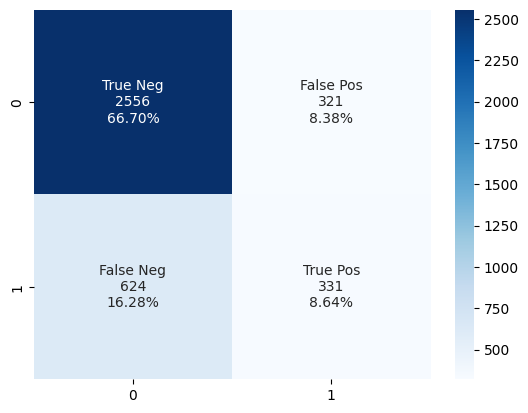

In [ ]:
train_model(KNeighborsClassifier(), knn_params)

# **Data Upscaling**

In [ ]:
df_final = df_prep.copy()

In [ ]:
df_final

,city,city_development_index,gender_Male,gender_Female,gender_Unknown,gender_Other,relevent_experience,enrolled_university_Full time course,enrolled_university_no_enrollment,enrolled_university_Part time course,...,company_type_Unknown,company_type_Pvt Ltd,company_type_Funded Startup,company_type_Other,company_type_Public Sector,company_type_Early Stage Startup,company_type_NGO,last_new_job,training_hours,company_size_avg
0,9,-0.380677,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,-0.810644,1
1,473,0.857814,0,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0.888584,2
2,318,-1.493888,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,2,-1.105624,2
3,10,-0.380677,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,-0.199700,3
4,473,0.857814,1,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,3,0.499008,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,473,0.857814,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,-1.105624,1
2125,60,0.483518,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,-0.469739,8
2126,21,0.336274,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,-0.948933,6
2127,30,-0.591885,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,3,0.690454,6


target
0.0    14381
1.0     4777
Name: count, dtype: int64


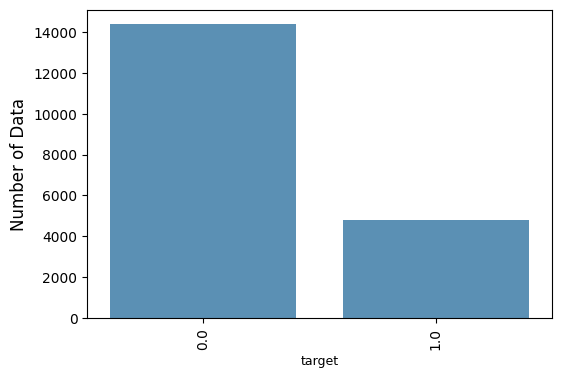

In [ ]:
# 0 – Not looking for job change,
# 1 – Looking for a job change
mnj = df['target'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=mnj.index, y=mnj.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
print(mnj)
plt.show();

In [ ]:
X1

,city,city_development_index,gender_Male,gender_Unknown,gender_Female,gender_Other,relevent_experience,enrolled_university_no_enrollment,enrolled_university_Full time course,enrolled_university_Part time course,...,company_type_Unknown,company_type_Pvt Ltd,company_type_Funded Startup,company_type_Early Stage Startup,company_type_Other,company_type_Public Sector,company_type_NGO,last_new_job,training_hours,company_size_avg
0,4355,0.845081,1,0,0,0,1,1,0,0,...,1,0,0,0,0,0,0,1,-0.291852,1
1,68,-0.881099,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,2,-0.005735,2
2,2702,-1.529706,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,2,0.667014,1
3,54,-0.785354,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,3,0.107512,1
4,128,-0.942434,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,3,-1.592545,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,151,0.160408,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,-0.128629,2
19154,4355,0.845081,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,4,0.107512,1
19155,4355,0.845081,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,2,-0.078194,8
19156,175,-0.680500,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,2,0.867145,9


In [ ]:
# Upsmapling
smote = SMOTE()
X2, Y2 = smote.fit_resample(X1, Y)

In [ ]:
# Syntethetics rows generated
X2 = pd.DataFrame(X2)
Y2 = pd.DataFrame(Y2)

target
1.0    14381
0.0    14381
Name: count, dtype: int64


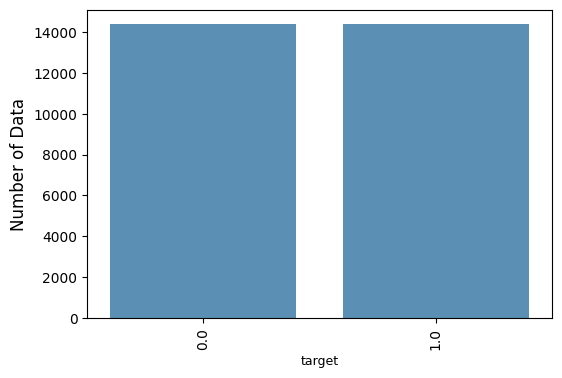

In [ ]:
# Class Balanced
# 0 – Not looking for job change,
# 1 – Looking for a job change
mnj = Y2['target'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=mnj.index, y=mnj.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('target', fontsize=9)
plt.xticks(rotation=90)
print(mnj)
plt.show();

In [ ]:
# Standard scaler numerik
scaler_x = StandardScaler()
scaled = scaler_x.fit_transform(X2)
X2 = pd.DataFrame(scaled, columns=X2.columns)

In [ ]:
df_final = pd.DataFrame(X2)
df_final['target'] = Y2['target']

# Exporting Data for preventing any data loss
df_final.to_csv("cleaned_dataset.csv",index = False)
df_final

,city,city_development_index,gender_Male,gender_Unknown,gender_Female,gender_Other,relevent_experience,enrolled_university_no_enrollment,enrolled_university_Full time course,enrolled_university_Part time course,...,company_type_Pvt Ltd,company_type_Funded Startup,company_type_Early Stage Startup,company_type_Other,company_type_Public Sector,company_type_NGO,last_new_job,training_hours,company_size_avg,target
0,1.549765,0.966034,0.766931,-0.511579,-0.223468,-0.081978,1.007889,0.704380,-0.474187,-0.215108,...,-0.854975,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.816848,-0.303737,-1.046411,1.0
1,-1.041121,-0.665717,0.766931,-0.511579,-0.223468,-0.081978,-0.992173,0.704380,-0.474187,-0.215108,...,1.169625,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.223381,-0.003113,-0.664994,0.0
2,0.550760,-1.278842,-1.303898,1.954734,-0.223468,-0.081978,-0.992173,-1.419689,2.108874,-0.215108,...,-0.854975,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.223381,0.703746,-1.046411,0.0
3,-1.049582,-0.575210,-1.303898,1.954734,-0.223468,-0.081978,-0.992173,0.704380,-0.474187,-0.215108,...,1.169625,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,0.370086,0.115875,-1.046411,1.0
4,-1.004859,-0.723697,0.766931,-0.511579,-0.223468,-0.081978,-0.992173,0.704380,-0.474187,-0.215108,...,-0.854975,5.165500,-0.14989,-0.064998,-0.190478,-0.136883,0.370086,-1.670377,-0.664994,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28757,-0.821738,0.033796,-1.303898,1.954734,-0.223468,-0.081978,-0.992173,-1.419689,-0.474187,-0.215108,...,-0.854975,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.816848,-0.138604,-0.283576,1.0
28758,1.549765,0.966034,-1.303898,-0.511579,-0.223468,-0.081978,-0.992173,0.704380,-0.474187,-0.215108,...,-0.854975,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.816848,0.246264,-1.046411,1.0
28759,1.549765,0.966034,0.766931,-0.511579,-0.223468,-0.081978,-0.992173,-1.419689,-0.474187,-0.215108,...,1.169625,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.816848,-1.698860,-1.046411,1.0
28760,-1.052603,-0.781957,-1.303898,1.954734,-0.223468,-0.081978,1.007889,-1.419689,-0.474187,-0.215108,...,-0.854975,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,2.150488,-1.465574,2.004927,1.0


In [ ]:
# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(X2,Y2,test_size=0.20,stratify=Y2)

# Taking copy to prevent data loss
X_test_copy = X_test.copy()

In [ ]:
X2 = pd.DataFrame(X2)
Y2 = pd.DataFrame(Y2)
X2

,city,city_development_index,gender_Male,gender_Unknown,gender_Female,gender_Other,relevent_experience,enrolled_university_no_enrollment,enrolled_university_Full time course,enrolled_university_Part time course,...,company_type_Unknown,company_type_Pvt Ltd,company_type_Funded Startup,company_type_Early Stage Startup,company_type_Other,company_type_Public Sector,company_type_NGO,last_new_job,training_hours,company_size_avg
0,1.549765,0.966034,0.766931,-0.511579,-0.223468,-0.081978,1.007889,0.704380,-0.474187,-0.215108,...,1.413145,-0.854975,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.816848,-0.303737,-1.046411
1,-1.041121,-0.665717,0.766931,-0.511579,-0.223468,-0.081978,-0.992173,0.704380,-0.474187,-0.215108,...,-0.707642,1.169625,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.223381,-0.003113,-0.664994
2,0.550760,-1.278842,-1.303898,1.954734,-0.223468,-0.081978,-0.992173,-1.419689,2.108874,-0.215108,...,1.413145,-0.854975,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.223381,0.703746,-1.046411
3,-1.049582,-0.575210,-1.303898,1.954734,-0.223468,-0.081978,-0.992173,0.704380,-0.474187,-0.215108,...,-0.707642,1.169625,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,0.370086,0.115875,-1.046411
4,-1.004859,-0.723697,0.766931,-0.511579,-0.223468,-0.081978,-0.992173,0.704380,-0.474187,-0.215108,...,-0.707642,-0.854975,5.165500,-0.14989,-0.064998,-0.190478,-0.136883,0.370086,-1.670377,-0.664994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28757,-0.821738,0.033796,-1.303898,1.954734,-0.223468,-0.081978,-0.992173,-1.419689,-0.474187,-0.215108,...,1.413145,-0.854975,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.816848,-0.138604,-0.283576
28758,1.549765,0.966034,-1.303898,-0.511579,-0.223468,-0.081978,-0.992173,0.704380,-0.474187,-0.215108,...,1.413145,-0.854975,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.816848,0.246264,-1.046411
28759,1.549765,0.966034,0.766931,-0.511579,-0.223468,-0.081978,-0.992173,-1.419689,-0.474187,-0.215108,...,-0.707642,1.169625,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.816848,-1.698860,-1.046411
28760,-1.052603,-0.781957,-1.303898,1.954734,-0.223468,-0.081978,1.007889,-1.419689,-0.474187,-0.215108,...,1.413145,-0.854975,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,2.150488,-1.465574,2.004927


For KNeighborsClassifier


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 



Best Parameters :  KNeighborsClassifier()


Accuracy : 0.8331305405875196


Precision Score :  0.8466546112115733


Recall Score :  0.8136948209940911


ROC AUC Score :  0.8331339195373794


Classification Report

               precision    recall  f1-score   support

         0.0       0.82      0.85      0.84      2876
         1.0       0.85      0.81      0.83      2877

    accuracy                           0.83      5753
   macro avg       0.83      0.83      0.83      5753
weighted avg       0.83      0.83      0.83      5753



Confusion Matrix




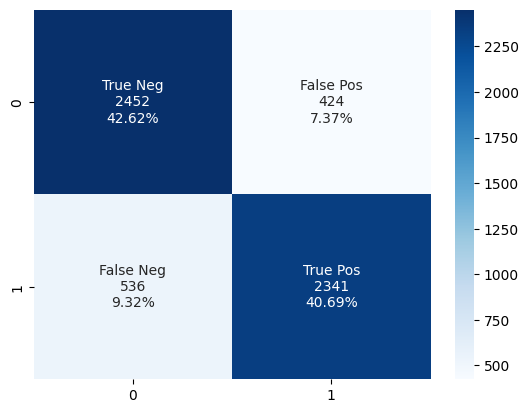

In [ ]:
train_model(KNeighborsClassifier(), knn_params)

# **Data Test**

In [ ]:
df_test = pd.read_csv("aug_test.csv")
df_test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [ ]:
def clean_data(df):
    cap_outliers(df)
    transform(df)
    clean_experience(df)
    clean_company_size_1(df)
    clean_last_new_job(df)
    clean_city(df)
    clean_relevent_experience(df)
    clean_NAN(df)
    df_one_hot = apply_one_hot_encoding(df)
    df_ordinal = apply_ordinal_encoding(df_one_hot)
    df_freq = apply_frequency_encoding(df_ordinal)
    df_prep = remove_columns(df_freq)
    return df_prep

In [ ]:
# Applying the  function for preprocessing for all features
df_prep = clean_data(df_test)

<ipython-input-226-4f9a41d967ee>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["experience"][df["experience"]==i]=0
<ipython-input-226-4f9a41d967ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [ ]:
# Standard scaler
scaler_x = StandardScaler()
scaled = scaler_x.fit_transform(df_prep)
X_test = pd.DataFrame(scaled, columns=X2.columns)
X_test

,city,city_development_index,gender_Male,gender_Unknown,gender_Female,gender_Other,relevent_experience,enrolled_university_no_enrollment,enrolled_university_Full time course,enrolled_university_Part time course,...,company_type_Unknown,company_type_Pvt Ltd,company_type_Funded Startup,company_type_Early Stage Startup,company_type_Other,company_type_Public Sector,company_type_NGO,last_new_job,training_hours,company_size_avg
0,-1.002893,-0.380677,0.676919,-0.262250,-0.55981,-0.106777,0.882391,1.973386,-1.636163,-0.26934,...,1.535592,-1.074643,-0.218486,-0.075289,-0.251866,-0.177461,-0.159781,-1.051944,-0.810644,-1.491331
1,1.548297,0.857814,-1.477282,3.813154,-0.55981,-0.106777,0.882391,-0.506743,0.611186,-0.26934,...,-0.651214,0.930541,-0.218486,-0.075289,-0.251866,-0.177461,-0.159781,-1.051944,0.888584,-1.012296
2,0.696068,-1.493888,0.676919,-0.262250,-0.55981,-0.106777,-1.133285,-0.506743,0.611186,-0.26934,...,-0.651214,0.930541,-0.218486,-0.075289,-0.251866,-0.177461,-0.159781,-0.374308,-1.105624,-1.012296
3,-0.997395,-0.380677,0.676919,-0.262250,-0.55981,-0.106777,-1.133285,-0.506743,0.611186,-0.26934,...,-0.651214,0.930541,-0.218486,-0.075289,-0.251866,-0.177461,-0.159781,-1.051944,-0.199700,-0.533261
4,1.548297,0.857814,0.676919,-0.262250,-0.55981,-0.106777,0.882391,-0.506743,0.611186,-0.26934,...,-0.651214,0.930541,-0.218486,-0.075289,-0.251866,-0.177461,-0.159781,0.303329,0.499008,-0.054226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1.548297,0.857814,0.676919,-0.262250,-0.55981,-0.106777,-1.133285,-0.506743,0.611186,-0.26934,...,-0.651214,-1.074643,-0.218486,-0.075289,3.970363,-0.177461,-0.159781,-1.051944,-1.105624,-1.491331
2125,-0.722482,0.483518,0.676919,-0.262250,-0.55981,-0.106777,-1.133285,-0.506743,0.611186,-0.26934,...,1.535592,-1.074643,-0.218486,-0.075289,-0.251866,-0.177461,-0.159781,-1.051944,-0.469739,1.861914
2126,-0.936914,0.336274,0.676919,-0.262250,-0.55981,-0.106777,-1.133285,-0.506743,0.611186,-0.26934,...,-0.651214,0.930541,-0.218486,-0.075289,-0.251866,-0.177461,-0.159781,-1.051944,-0.948933,0.903844
2127,-0.887430,-0.591885,0.676919,-0.262250,-0.55981,-0.106777,-1.133285,1.973386,-1.636163,-0.26934,...,-0.651214,-1.074643,-0.218486,-0.075289,3.970363,-0.177461,-0.159781,0.303329,0.690454,0.903844


In [ ]:
y_train

,target
26402,1.0
12987,0.0
8165,1.0
17326,0.0
13943,0.0
...,...
27840,1.0
18025,0.0
12132,0.0
24892,1.0


In [ ]:
X_train

,city,city_development_index,gender_Male,gender_Unknown,gender_Female,gender_Other,relevent_experience,enrolled_university_no_enrollment,enrolled_university_Full time course,enrolled_university_Part time course,...,company_type_Unknown,company_type_Pvt Ltd,company_type_Funded Startup,company_type_Early Stage Startup,company_type_Other,company_type_Public Sector,company_type_NGO,last_new_job,training_hours,company_size_avg
26402,1.549765,0.966034,0.766931,-0.511579,-0.223468,-0.081978,-0.992173,0.704380,-0.474187,-0.215108,...,-0.707642,-0.854975,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.816848,0.689200,0.097841
12987,0.550760,-1.278842,0.766931,-0.511579,-0.223468,-0.081978,-0.992173,0.704380,-0.474187,-0.215108,...,-0.707642,1.169625,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.223381,-0.244297,-1.046411
8165,1.549765,0.966034,-1.303898,1.954734,-0.223468,-0.081978,-0.992173,0.704380,-0.474187,-0.215108,...,1.413145,-0.854975,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.816848,-1.052562,1.242092
17326,-0.571534,0.966034,0.766931,-0.511579,-0.223468,-0.081978,1.007889,0.704380,-0.474187,-0.215108,...,-0.707642,-0.854975,-0.193592,-0.14989,-0.064998,5.249959,-0.136883,-0.816848,0.069381,-0.664994
13943,-0.898492,-0.460031,0.766931,-0.511579,-0.223468,-0.081978,-0.992173,0.704380,-0.474187,-0.215108,...,-0.707642,1.169625,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.816848,-0.570134,-1.046411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27840,-1.065899,-0.770933,0.766931,-0.511579,-0.223468,-0.081978,-0.992173,0.704380,-0.474187,-0.215108,...,-0.707642,-0.854975,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,-0.816848,0.464279,-0.283576
18025,0.550760,-1.278842,0.766931,-0.511579,-0.223468,-0.081978,1.007889,0.704380,-0.474187,-0.215108,...,1.413145,-0.854975,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,0.370086,-2.126146,-1.046411
12132,1.549765,0.966034,0.766931,-0.511579,-0.223468,-0.081978,-0.992173,-1.419689,-0.474187,4.648832,...,-0.707642,-0.854975,-0.193592,-0.14989,-0.064998,-0.190478,7.305512,-0.816848,-0.498603,0.479258
24892,0.550760,-1.278842,0.766931,-0.511579,-0.223468,-0.081978,-0.992173,0.704380,-0.474187,-0.215108,...,-0.707642,-0.854975,-0.193592,-0.14989,-0.064998,-0.190478,-0.136883,2.150488,-0.862491,-1.046411


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', weights='uniform')
knn.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
# Assuming X_train has the correct column names and order
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  # Fill missing columns with 0

# Now, you can predict using the modified X_test
y_pred = knn.predict(X_test)

In [ ]:
# Create a submission DataFrame if needed
submission_df = pd.DataFrame({'enrollee_id': df_test['enrollee_id'], 'target': y_pred})

# Save your predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)

In [ ]:
submission_df

,enrollee_id,target
0,32403,0.0
1,9858,0.0
2,31806,1.0
3,27385,0.0
4,27724,0.0
...,...,...
2124,1289,1.0
2125,195,0.0
2126,31762,0.0
2127,7873,1.0
